# **Temporal Convolutional Networks (TCNs) in PyTorch**

TCNs are a type of neural network architecture designed for sequential data, offering a powerful alternative to RNNs and LSTMs.
They use:
- **1D Convolutions** to process sequences.
- **Causal Convolutions** to ensure no future data leaks into past states.
- **Dilated Convolutions** to expand the receptive field efficiently.

This tutorial will implement a simple TCN using PyTorch.

## **1. Preparation**
Let's generates a noisy sinusoidal sequence to test our TCN on.

First, let's import the packages we need:

In [ ]:
# Imports
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

The following is a function which will generate the data for us.

In [ ]:
# Generate sample dataset
def generate_sinusoidal_data(seq_length=50, num_samples=1000): # Uses past `seq_length` time steps to predict the next step
    X = np.linspace(0, 100, num_samples)
    y = np.sin(X) + np.random.normal(0, 0.1, num_samples)
    X_seq = np.array([y[i:i+seq_length] for i in range(num_samples - seq_length)])
    y_seq = np.array([y[i+seq_length] for i in range(num_samples - seq_length)])
    return torch.tensor(X_seq, dtype=torch.float32).unsqueeze(1), torch.tensor(y_seq, dtype=torch.float32)

Now we can call the function and make a data loader for it.

In [ ]:
X_train, y_train = generate_sinusoidal_data()
data_loader = torch.utils.data.DataLoader(list(zip(X_train, y_train)), batch_size=32, shuffle=True)

## **2. Defining the Temporal Block**

Before we build the actual network, we need to define what a single temporal block looks like.

`__init__` method:
- `padding`: Causal convolutions ensure that future information doesn't leak into the past. This padding calculation ensures that the convolution doesn't use future data points.
- `self.conv`: A sequential container that holds two convolutional layers with ReLU activations:
  - The first convolutional layer (`nn.Conv1d`) takes in_channels as input and outputs `out_channels` features. It uses the `kernel_size`, `stride=1`, the calculated padding, and the given dilation.
  - `nn.ReLU()` is applied after each convolution to introduce non-linearity.
  - The second convolutional layer operates on `out_channels` and outputs the same number of channels, using the same kernel size, stride, padding, and dilation.
- `self.downsample`: This is used for the residual connection. If the number of input channels (`in_channels`) is not equal to the number of output channels (`out_channels`), a 1x1 convolution is applied to match the dimensions for addition. If they are already equal, no downsample operation is needed (`None`).

`forward` method: Defines the forward pass of the block:
- `res = x if self.downsample is None else self.downsample(x)`: If the input and output dimensions match, the input `x` is used directly as the residual (res). If the dimensions differ, the downsample convolution is applied to `x` to match the dimensions.
- `out = self.conv(x)`: The input `x` is passed through the convolution layers.
- `return out[:, :, :x.shape[-1]] + res`: The output is trimmed to match the input length, and the residual connection (`res`) is added to the output to facilitate gradient flow during training.


In [ ]:
class TemporalBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, dilation):
        super(TemporalBlock, self).__init__()
        padding = XXXX  # Ensures causality

        self.conv = nn.Sequential(
            nn.XXXX(XXXX, XXXX, XXXX,
                      XXXX=XXXX, XXXX=XXXX, XXXX=XXXX),
            nn.XXXX(),
            nn.XXXX(XXXX, XXXX, XXXX,
                      XXXX=XXXX, XXXX=XXXX, XXXX=XXXX),
            nn.XXXX()
        )

        self.downsample = nn.Conv1d(in_channels, out_channels, 1) if in_channels != out_channels else None

    def forward(self, x):
        res = x if self.downsample is None else self.downsample(x)
        out = XXXX
        return out[:, :, :x.shape[-1]] + res  # Trim to match input length

## **3. Defining the TCN Model**
- `__init__` method: The constructor of the TCN class. It initializes the TCN with `input_dim` (number of input features),  `output_dim` (number of output features; predictions), `num_channels` (list defining the number of channels in each `TemporalBlock`), and `kernel_size` (size of the convolutional kernel; default is 2).
  - `super(TCN, self).__init__()`: Initializes the base class nn.Module.
  - `layers`: This is a list of TemporalBlock layers, where each block has increasing dilation (powers of 2):
    - For the first block (i == 0), the input channels are input_dim.
    - For subsequent blocks, the number of input channels is the output of the previous block.
    - kernel_size is passed as-is, and dilation is set to 2^i to increase the receptive field progressively.
  - `self.network`: This line stacks all TemporalBlock layers into a single sequential network.
  - `self.fc`: A fully connected (linear) layer that maps the output of the last TemporalBlock (which has `num_channels[-1]` channels) to the final output dimension (`output_dim`).

- `forward` method: Defines the forward pass of the full TCN:
  - The input x is passed through the stacked TemporalBlock network (`self.network(x)`).
  - We select only the last time step (`[:, :, -1]`) of the output because the model predicts a single value at the final time step.
  - This last time step's output is passed through the fully connected layer (`self.fc`) to generate the final prediction.

In [ ]:
# Define the Temporal Convolutional Network (TCN)
class TCN(nn.Module):
    def __init__(self, input_dim, output_dim, num_channels, kernel_size=2):
        super(TCN, self).__init__()
        layers = [TemporalBlock(XXXX if i == 0 else XXXX,
                                XXXX, XXXX, XXXX)
                  for i in range(len(num_channels))]
        self.network = nn.Sequential(*layers)
        self.fc = nn.Linear(XXXX, XXXX)

    def forward(self, x):
        return self.fc(self.network(x)[:, :, -1])

## **4. Training the TCN**

For our first attempt at training, we will:
- Use the Adam optimizer.
- Use MSE loss.
- Run for 20 epochs.

In [ ]:
model = TCN(input_dim=1, output_dim=1, num_channels=[16, 32, 32, 16])
criterion = XXXX
optimizer = XXXX

for XXXX in XXXX:
    total_loss = 0
    for XXXX in XXXX:
        XXXX
        XXXX
        XXXX
        XXXX
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/20, Loss: {total_loss/len(data_loader):.4f}")

Epoch 1/20, Loss: 0.1652
Epoch 2/20, Loss: 0.0165
Epoch 3/20, Loss: 0.0145
Epoch 4/20, Loss: 0.0142
Epoch 5/20, Loss: 0.0133
Epoch 6/20, Loss: 0.0130
Epoch 7/20, Loss: 0.0137
Epoch 8/20, Loss: 0.0128
Epoch 9/20, Loss: 0.0128
Epoch 10/20, Loss: 0.0121
Epoch 11/20, Loss: 0.0121
Epoch 12/20, Loss: 0.0120
Epoch 13/20, Loss: 0.0123
Epoch 14/20, Loss: 0.0123
Epoch 15/20, Loss: 0.0118
Epoch 16/20, Loss: 0.0117
Epoch 17/20, Loss: 0.0117
Epoch 18/20, Loss: 0.0115
Epoch 19/20, Loss: 0.0121
Epoch 20/20, Loss: 0.0123


## **5. Evaluate the Model**

In [ ]:
# Test the Model
X_test, y_test = XXXX()
y_pred = model(XXXX).detach().numpy()

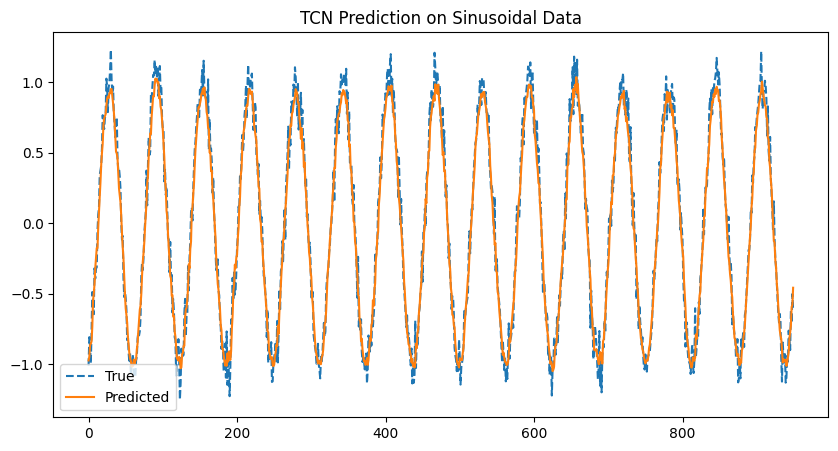

In [ ]:
# Visualize the predicted values
t = np.arange(len(y_test))
plt.figure(figsize=(10,5))
plt.plot(t, y_test.numpy(), label='True', linestyle='dashed')
plt.plot(t, y_pred, label='Predicted')
plt.legend()
plt.title("TCN Prediction on Sinusoidal Data")
plt.show()

## **6. Your turn!**

1. See how much you can improve the model's performance.

2. If you are satisfied with your model, generate a new sequence of data that doesn't follow such a predicatable pattern. There are many packages available that can help you create them.